### Lecture 4: Homework

Today we gonna learn how to choose between ML models, based on data type. Your task would be to predict **the edibility of a mushroom** based on sample descriptions (binary classification problem)

The **tricky part here is that 95% of the features are of categorical type.**
<br>That's the one where we would **(usually)  prefer tree-based algorithms over linear methods**

Although this dataset was originally contributed to the UCI Machine Learning repository nearly 30 years ago, mushroom hunting (otherwise known as "shrooming") is enjoying new peaks in popularity. Learn which features spell certain death and which are most palatable in this dataset of mushroom characteristics. And how certain can your model be?

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

More information can be found [here](https://www.kaggle.com/uciml/mushroom-classification/data)

Please find below correspondent [google form](https://docs.google.com/forms/d/e/1FAIpQLScmKfUApMlcD81u9UZxM7xG3vJiEJHrPrG-3b0i_jyPEDijgQ/viewform) to submit your answers

In [1]:
# library import
import pandas as pd
import numpy as np
from os.path import join as pjoin
pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 100

# preprocessing / validation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
)
# ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# metrics
from sklearn.metrics import classification_report, f1_score

# vizualizing
import matplotlib.pyplot as plt
% matplotlib inline 
import seaborn as sns
import matplotlib.style as style


In [2]:
# read data
DATA_DIR = '../data'
df_train = pd.read_csv(pjoin(DATA_DIR, '4-mushrooms-train.csv'), engine='c')
df_test = pd.read_csv(pjoin(DATA_DIR, '4-mushrooms-test.csv'), engine='c')
ytest = pd.read_csv(pjoin(DATA_DIR, '4-mushrooms-y_test.csv'))
print(df_train.shape, df_test.shape)

(6499, 23) (1625, 22)


In [3]:
# let's see what data looks like
df_train.head()

,target,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,0,convex,scaly,brown,bruises,pungent,free,close,narrow,white,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,brown,scattered,urban
1,1,flat,fibrous,gray,bruises,none,free,close,broad,brown,tapering,bulbous,smooth,smooth,white,white,partial,white,one,pendant,brown,several,woods
2,0,flat,smooth,brown,no,none,attached,close,broad,orange,enlarging,missing,smooth,smooth,orange,orange,partial,orange,one,pendant,brown,several,leaves
3,1,convex,fibrous,gray,bruises,none,free,close,broad,brown,tapering,bulbous,smooth,smooth,white,white,partial,white,one,pendant,black,solitary,woods
4,0,knobbed,smooth,brown,no,foul,free,close,narrow,buff,tapering,missing,silky,smooth,pink,pink,partial,white,one,evanescent,white,several,paths


In [4]:
# for convenient calculations, let us merge train with test
df = pd.concat([df_train, df_test], axis=0)
# add column for filtering train/test
df['is_train'] = True
df.loc[df.target.isnull(), 'is_train'] = False
# check shapes
print(df.shape)
# check labels
df.is_train.value_counts()

(8124, 24)


True     6499
False    1625
Name: is_train, dtype: int64

### Task 1. Which feature has the highest amount of unique values? (joint dataset)


In [5]:
most_diversive = df.nunique().idxmax()

print(most_diversive)

gill_color


#### .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .   
#### visualizing results

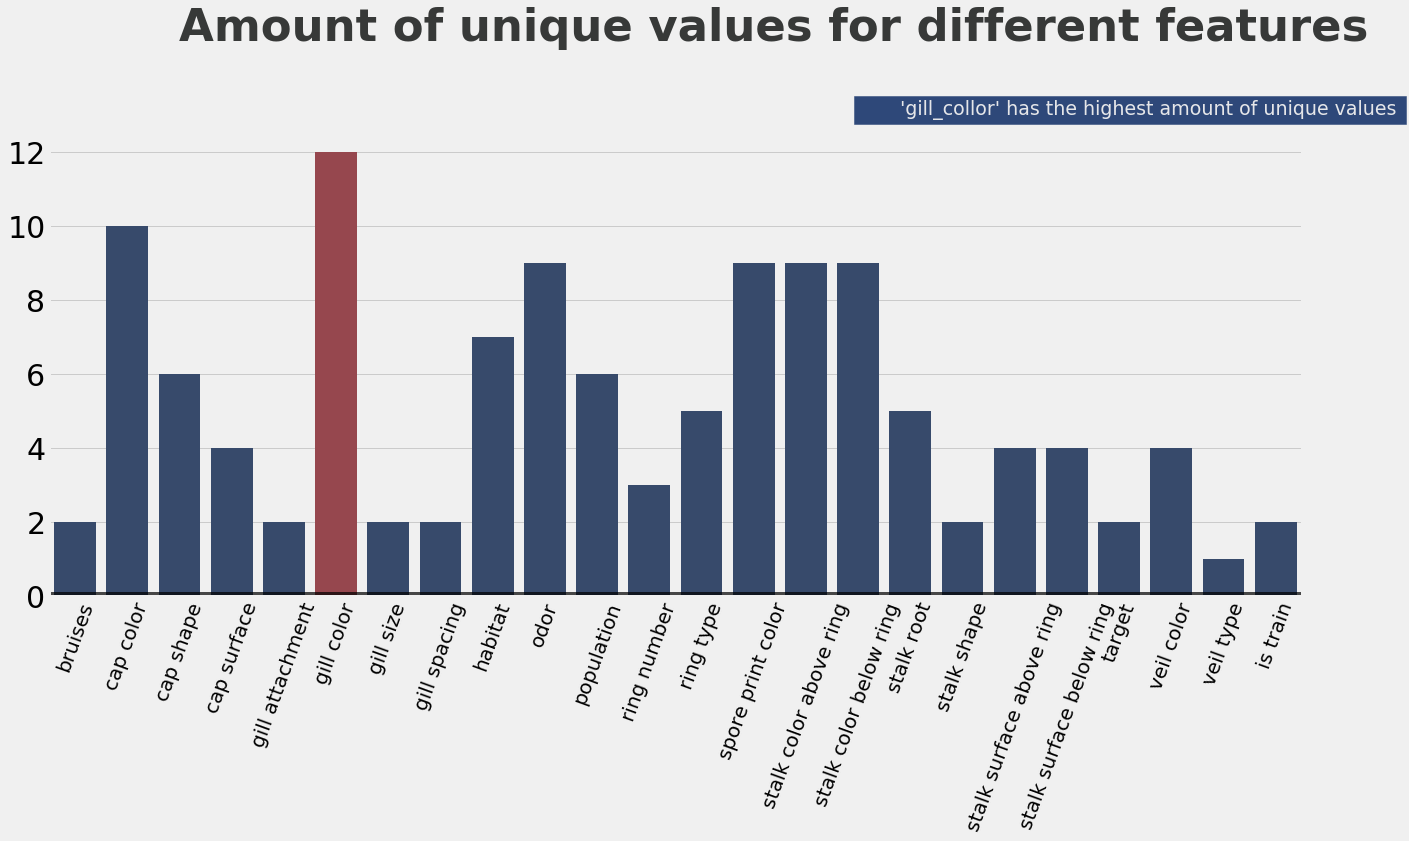

In [27]:
tdf = df.nunique()


style.use('fivethirtyeight') 
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)

#highlightning the bar with the largest value 
colors  = ['#2e4874' if (x < max(tdf.values)) else '#a33a43' for x in tdf.values ]

#plotting 
fte = sns.barplot(x = tdf.index , y = tdf.values, palette=colors)

#customizing plot
fte.tick_params(axis = 'x', which = 'major', labelsize = 20, rotation=70,)
fte.tick_params(axis = 'y', which = 'major', labelsize = 30)
fte.set_xticklabels(labels = [tick.replace('_', ' ') for tick in tdf.index])
fte.text(x = 2,
         y = 15,
         s = "Amount of unique values for different features ",
         fontsize = 45,
         weight = 'bold',
         color = '#343635',
         alpha = 5)
fte.text(x = 15,
         y = 13, 
         s = "       'gill_collor' has the highest amount of unique values ",
         fontsize = 19,
         alpha = .95,
         backgroundcolor='#2e4879',
         color = '#f0f0f0')
fte.axhline(y = 0, color = 'black', linewidth = 8, alpha = .7)


### Task 2
**As a preparation, one would spend up to 15-30 minutes on exploratory data analysis (EDA)** - make sure you understand how features are distributed in train/test, what they look like, are they ordinal/binary/categorical before moving further
<br>While doing it, please answer the questions

Text(-0.4,3700,'Distribution of mushrooms ')

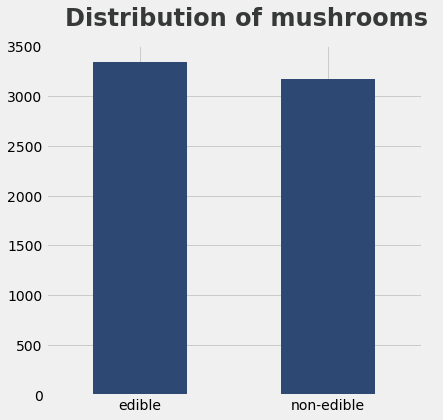

In [28]:
g = df_train['target'].value_counts().plot(kind='bar', label = 'eatable', figsize=(6, 6), color = colors)
g.set_xticklabels(labels = ['edible', 'non-edible'], rotation = 0)
g.text(x = -0.4,
         y = 3700,
         s = "Distribution of mushrooms ",
         fontsize = 24,
         weight = 'bold',
         color = '#343635',
         alpha = 5)


As we can see the classes are balanced

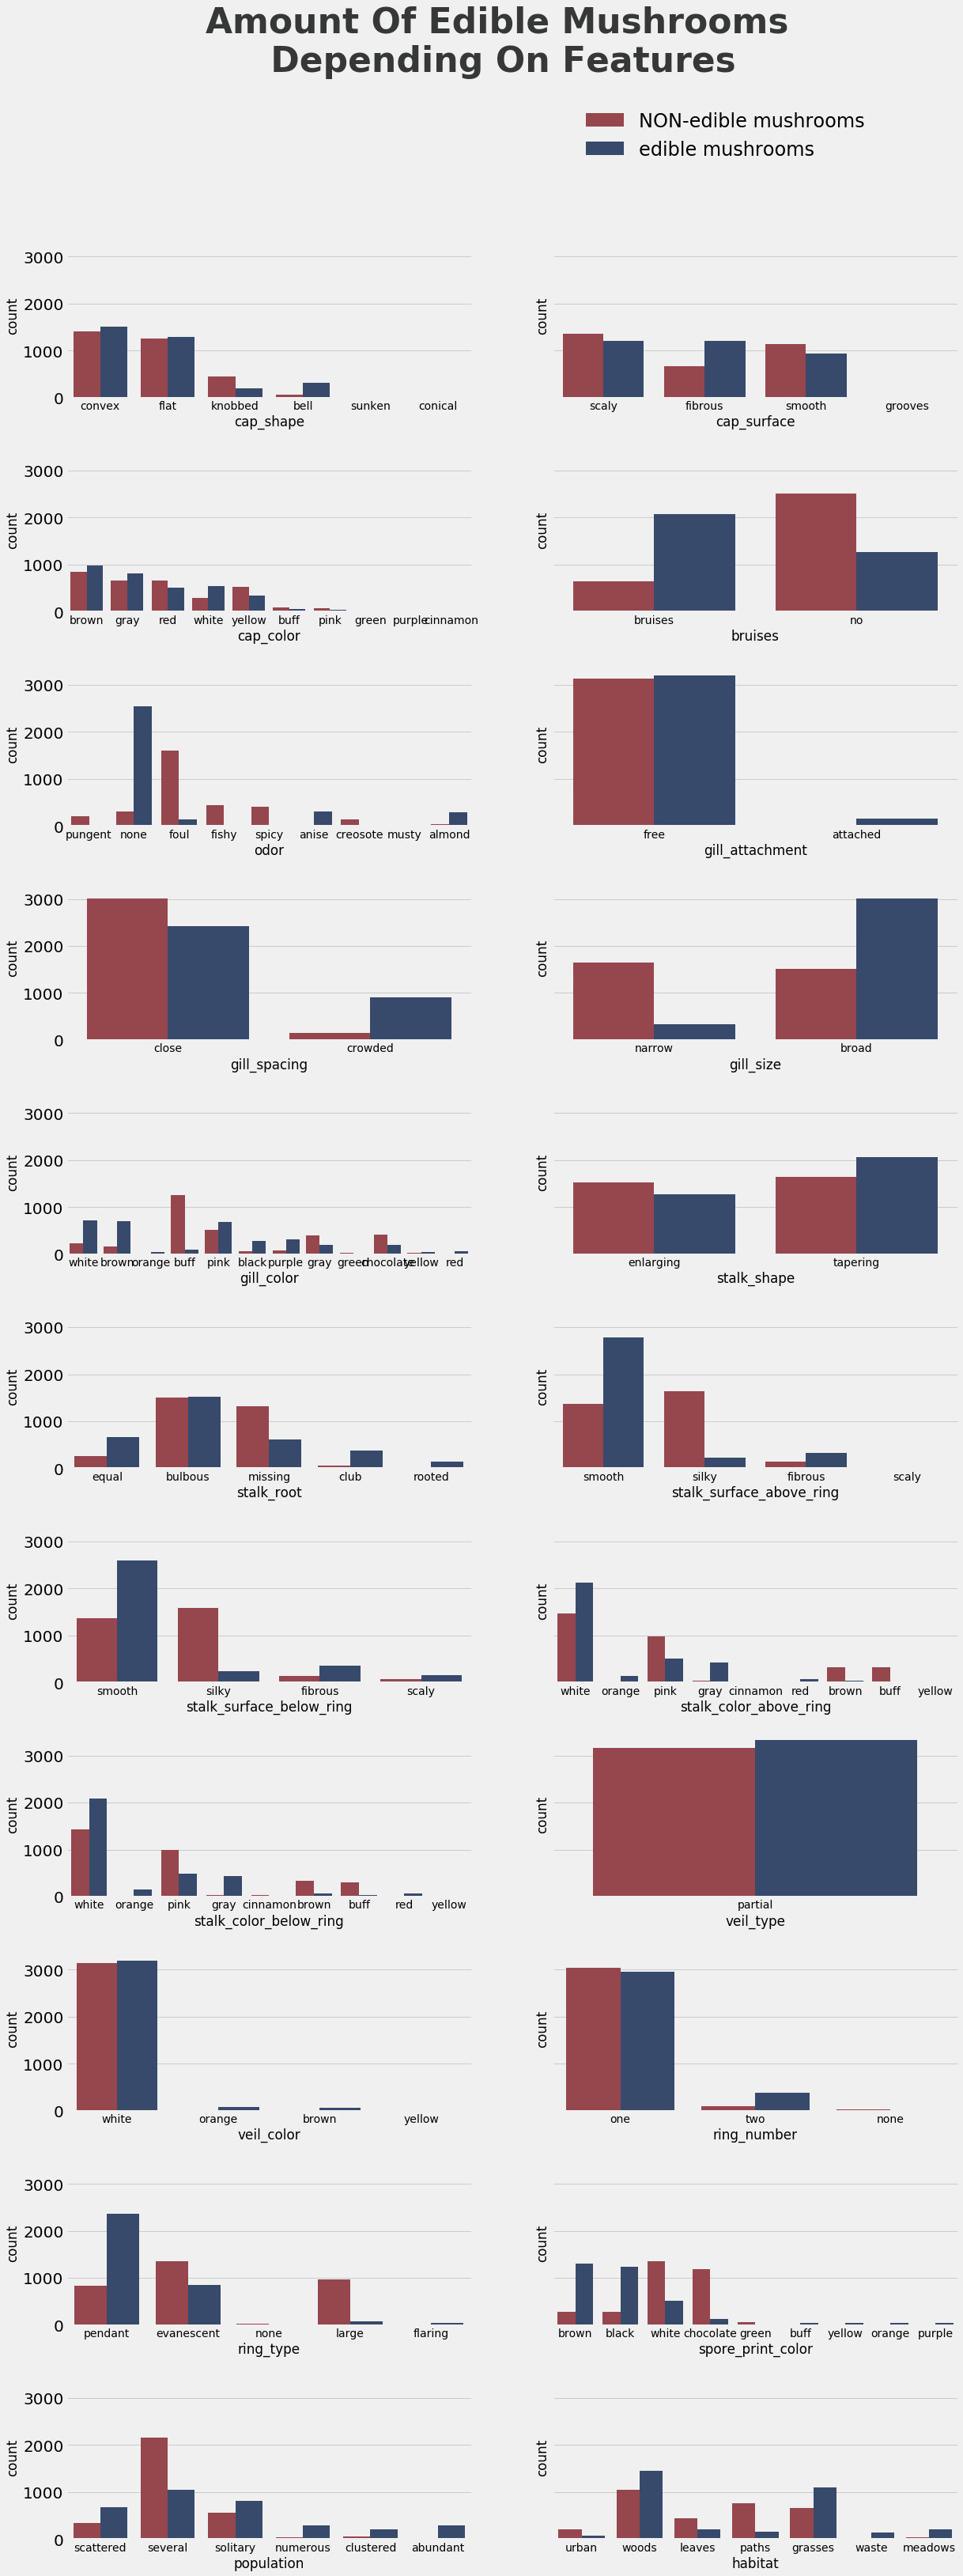

In [29]:
features = df_train.columns.values[1:]
colors =['#a33a43', '#2e4874'] # custom colors


fig, axes = plt.subplots(11, 2, sharey=True, figsize=(18, 50), gridspec_kw = {'hspace':0.3},)

fig.suptitle("Amount Of Edible Mushrooms\n Depending On Features",y=.96, fontsize=44, weight = 'bold',color = '#343635',
         alpha = 4)

for i, (col,ax) in enumerate(zip(features, axes.flatten())):
    #countplot for every feature
    sns.countplot(data=df_train, ax=ax, hue='target', x=features[i], palette=colors)
    
    #customizing every subplot
    ax.tick_params(axis = 'x', which = 'major', labelsize = 14, rotation=0,)
    ax.tick_params(axis = 'y', which = 'major',labelsize = 20)
    ax.legend_.remove()
    handles, labels = ax.get_legend_handles_labels()
#setting global legend    
fig.legend(handles, ['NON-edible mushrooms', 'edible mushrooms'], loc=(0.6, 0.935), fontsize = 24, frameon=False)  

In [30]:
df_test.veil_type.value_counts()

partial    1625
Name: veil_type, dtype: int64

'veil_type' feature has only one unique value, so it's better to remove it 

#### 2.1 Are there any features, obviously redundant to train on? If yes - what are they and why it's better to remove them?

In [6]:
print(df.shape)

redundant_columns = ['veil_type']

# lets drop these columns from joint dataset
df = df.drop(redundant_columns, axis=1, errors='ignore')
print(df.shape)

(8124, 24)
(8124, 23)


####  2.2 How many features (excluding target variable and train/test indexing columns) are:
- categorical (more than 2 unique values, no explicit ordering)
- ordinal (more than 2 unique values, explicit ordering)
- binary (2 unique values, doesn't matter whether it has ordering or is "yes/no" styled) 

In [7]:
# Selecting categorical/ordinal/binary features by using the vizualization above
ordinal_cols = sorted(['ring_number'])
categorical_cols = sorted(['cap_shape',
                           'cap_surface',
                           'cap_color',
                           'odor',
                           'gill_color',
                           'stalk_root', 
                           'stalk_color_above_ring', 
                           'stalk_color_below_ring',
                           'stalk_surface_above_ring',
                           'stalk_surface_below_ring', 
                           'veil_color', 
                           'ring_type', 
                           'spore_print_color', 
                           'population', 
                           'habitat'])
binary_cols = sorted(['bruises', 
                      'gill_attachment', 
                      'gill_spacing', 
                      'gill_size', 
                      'stalk_shape'])
# ---------------------------------------------------------------
print('categorical: {}\nordinal: {}\nbinary: {}'.format(
    len(categorical_cols), len(ordinal_cols), len(binary_cols)))

categorical: 15
ordinal: 1
binary: 5


In [8]:
# To be used in training, data must be properly encoded
from collections import defaultdict

# function to encode categorical data
def __encode_categorical(df_list, cat_cols):
    # initialize placeholder
    d = defaultdict(LabelEncoder)
    # fit and encode train/test,
    codes = pd.concat(
        [df[cat_cols] for df in df_list],
        axis=0
    ).fillna('').apply(
        lambda x: d[x.name].fit(x)
    ),
    # transform encodings to train/test etc
    for df in df_list:
        df[cat_cols] = df[cat_cols].fillna('').apply(
            lambda x: d[x.name].transform(x))


# label encode data (categorical + binary)
__encode_categorical(df_list=[df], cat_cols=categorical_cols+binary_cols)
# make sure you encode the only ordinal column in correct order
df[ordinal_cols[0]] = df[ordinal_cols[0]].map({'none': 0, 'one': 1, 'two': 2})

# define useful feature columns to be used for training
# (union of all columns discussed above)
columns_to_use = ordinal_cols + binary_cols + categorical_cols

### Task 3. Prepare cross-validation strategy and perform comparison of 2 baseline models (linear vs tree-based)

### =====================================================
#### Briefly about Validation / Cross-Validation

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but **would fail to predict anything useful on yet-unseen data. This situation is called overfitting**. 
<br>To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set ```X_test, y_test```. 
<br>Note that the word “experiment” is not intended to denote academic use only, because even in commercial settings machine learning usually starts out experimentally.

When evaluating different settings (“hyperparameters”) for estimators, **there is still a risk of overfitting on the test set** because the parameters can be tweaked until the estimator performs optimally. 
<br>This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. 
<br>To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, **we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.**

A solution to this problem is a procedure called **cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV**. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

- A model is trained using k-1 of the folds as training data;
- the resulting model is validated on the remaining part of the data 
<br>(i.e., it is used as a test set to compute a performance measure such as accuracy).
        
<img src="https://hsto.org/files/b1d/706/e6c/b1d706e6c9df49c297b6152878a2d03f.png"/ style="width:75%">

The performance measure reported by k-fold cross-validation **is then the average of the values computed in the loop**. 
<br>This approach can be computationally expensive, but does not waste too much data (as it is the case when fixing an arbitrary test set), which is a major advantage in problem such as inverse inference where the number of samples is very small.


Some classification problems can **exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples**. 
<br>In such cases it is recommended to use **stratified sampling** as implemented in sklearn's StratifiedKFold and StratifiedShuffleSplit to ensure that relative class frequencies is approximately preserved in each train and validation fold.

More details about different cross-validation strategies, implemented in sklearn, can be found [here](http://scikit-learn.org/stable/modules/cross_validation.html)
### =====================================================

Prepare KFold with 5 splits, stratified by target variable, shuffled, with fixed random_state = 42
<br>**Don't forget to filter by column 'is_train'!**
<br>Fit models on subset of features: [columns_to_use]

In [9]:
xtrain = df[df['is_train']][columns_to_use]
ytrain = df[df['is_train']]['target']
xtest =  df[df['is_train']==0][columns_to_use]
y_true = pd.read_csv(pjoin(DATA_DIR, '4-mushrooms-y_test.csv'))

In [128]:
from os import cpu_count

n_jobs = max(cpu_count()-1, 1)

# cross-validation iterator
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
#depth=3, random_state=42
dt = DecisionTreeClassifier(max_depth=3,random_state=42)

# estimate its f1-score with cross-validation (cross_val_score)
scores_dt = cross_val_score(estimator=dt,
                            X=xtrain, 
                            y=ytrain,
                            scoring='f1',
                            cv=kf, # cross-validation strategy
                            n_jobs=n_jobs
                            ).mean()
print('DT scoring: {:.4f}'.format(scores_dt))

# create Logistic Regression with default params, random_state=42
lr = LogisticRegression(random_state=42)

# estimate its f1-score with cross-validation
scores_lr = cross_val_score(
                            estimator=lr,
                            X=xtrain, # ...
                            y=ytrain, # ...
                            scoring='f1',
                            cv=kf,
                            n_jobs=n_jobs
                        ).mean()
print('LR scoring: {:.4f}'.format(scores_lr))

DT scoring: 0.9012
LR scoring: 0.8904


In [11]:
baseline = scores_dt

### Task 4. Now it's time to do some hyperparam tuning
Perform suitable hyperparam tuning using created above cross-validation strategy
<br>Main parameters to perform grid-search for:
- max_depth (1,2,...None)
- min_samples_leaf (1,2,...)
- criterion (gini, entropy)
- weight (none, balanced)
- max_features (sqrt(features), 50%, 75%, all of them, ...)
- other params available, see documentation

So - use your fantasy for filling-in abovementioned lists

You should receive **a gain of 0.01 in f1-score or higher**
<br>(current benchmark = +0.0268 gain)

In [129]:
%%time
# your code goes here
# ---------------------------------------------------------------
# create base model (DT, random state = 42)
estimator = DecisionTreeClassifier(random_state=42)

# create parameter grid
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
params = {'criterion': ['gini', 'entropy'],
          'max_depth': [ 7, 8, 9, 10, 11, 12],
          'min_samples_leaf': [1, 2, 5, 7],
          'max_features': ['sqrt', 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
          'class_weight': ['balanced', None]
    
}

# create grid search object
gs = GridSearchCV(
    estimator=estimator,  # base model
    param_grid=params,  # params grid to search within
    cv=kf,  # cross-validation strategy
    error_score=1,  # warnings only
    scoring='f1',  # f1-score
    # thread count, the higher count - the faster
    n_jobs=n_jobs,
    verbose=1,  # messages about performed actions
)

# perform grid search on TRAIN dataset ('is_train' filtering)
gs.fit(
    X=df[df['is_train']==1][columns_to_use],
    y=df[df['is_train']==1]['target']
)
# -------------------------------------------------------------
# extract best score on cross-validation
best_score = gs.best_score_
# extract the estimator (DT) with best params on cross-validation
best_dt = gs.best_estimator_
# check gain in f1-score
print('f1-score best: {:.4f}, +{:.4f} better than baseline'.format(
    best_score, (best_score - scores_dt))
)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=3)]: Done 758 tasks      | elapsed:    4.0s
[Parallel(n_jobs=3)]: Done 4058 tasks      | elapsed:   18.1s


f1-score best: 0.9282, +0.0270 better than baseline
CPU times: user 3.23 s, sys: 180 ms, total: 3.41 s
Wall time: 25.3 s


[Parallel(n_jobs=3)]: Done 5760 out of 5760 | elapsed:   25.0s finished


In [130]:
# check performance on holdout dataset, unseen before (filter 'is_train' == False)

# your code goes here
# —-------------------------------------------------------------
# appropriate df_test data subset from 'df' dataframe
xtest = df[df.is_train == False][columns_to_use]
# fit baseline model 'dt' on xtrain, ytrain (because it's not fitted yet)
dt.fit(xtrain, ytrain)
# —-------------------------------------------------------------

# baseline model
y_true = pd.read_csv(pjoin(DATA_DIR, '4-mushrooms-y_test.csv'))
y_pred_baseline = dt.predict(xtest)

print('Base on train:   {:.4f}\nBase on holdout: {:.4f}\ndiff: {:.4f}'.format(
    scores_dt, 
    f1_score(y_true, y_pred_baseline),
    scores_dt - f1_score(y_true, y_pred_baseline)
))

# best model
y_pred_best = best_dt.predict(xtest)

print('\nBest on train:   {:.4f}\nBest on holdout: {:.4f}\ndiff: {:.4f}'.format(
    best_score, 
    f1_score(y_true, y_pred_best),
    best_score - f1_score(y_true, y_pred_best)
))
f1_score_dt = f1_score(y_true, y_pred_best)

Base on train:   0.9012
Base on holdout: 0.8888
diff: 0.0125

Best on train:   0.9282
Best on holdout: 0.9205
diff: 0.0077


**Bonus question**:

Consider two possibilities:
- (a) you have trained **one best** (on cross-validation) Decision Tree
- (b) you randomly choose 25 subsets of 70% of training data, fits "overfitted" (max_depth=None) Decision Trees on it - each of them performs slightly worse than Tree in (a), and then average predicted results over all 25 models (overfitted trees)

**Which one of them would most likely give the best results on hold-out dataset? What makes you think that way?**

In [178]:
from sklearn.model_selection import train_test_split

overfitted_preds = []
for i in range(25):
    Xtrain, Xtest,Ytrain, Ytest = train_test_split( xtrain, ytrain ,test_size=0.3)
    clf = DecisionTreeClassifier(max_depth=None, random_state=42)
    clf.fit(Xtrain, Ytrain)
    overfitted_preds.append(clf.predict(xtest))
exp_pred = np.array(overfitted_preds).T.mean(axis=1)
exp_pred_new = [1 if x>= 0.5 else 0 for x in exp_pred]

In [179]:
f1_score( y_true, exp_pred_new)

0.90012033694344162

### other models 

    best_dt remains the best  model but there are others very close to it

#### .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .    .  

#### One-Hot Encoding

In [13]:
enc_train = pd.get_dummies(df_train[categorical_cols])
enc_test =  pd.get_dummies(df_test[categorical_cols])
xtrain_onehot = pd.concat([df[df.is_train][ordinal_cols+binary_cols], 
                       enc_train], 
                       axis=1, 
                       join_axes=[df[df.is_train].index])
xtest_onehot = pd.concat([df[df.is_train == False][ordinal_cols+binary_cols], 
                       enc_test], 
                       axis=1, 
                       join_axes=[df[df.is_train == False].index])

### LogisticRegression + one hot + grid_search

In [14]:
estimator = lr

params = {'C': [0.1, 0.2, 0.3, 0.5, 1]}

gs = GridSearchCV(
    estimator=LogisticRegression(), 
    param_grid=params, 
    cv=kf, 
    error_score=1,  
    scoring='f1', 
    n_jobs=n_jobs,
    verbose=1, 
)


gs.fit(X=xtrain_onehot, y=ytrain )

best_score_lr = gs.best_score_
best_lr = gs.best_estimator_

print('f1-score best: {:.4f}, +{:.4f} better than baseline'.format(
    best_score_lr, (best_score_lr - scores_dt))
)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=3)]: Done  25 out of  25 | elapsed:    0.6s finished


f1-score best: 0.9282, +0.0269 better than baseline


In [92]:
def score(model, X, y, X_test, y_test):
    score_cv = cross_val_score(estimator=model,
                                X=X, 
                                y=y,
                                scoring='f1',
                                cv=kf,
                                n_jobs=n_jobs).mean()
    print("CV score:  ", score_cv)
    model.fit(X,y)
    pred = model.predict(X_test)
    print("f1 on holdout: ", round(f1_score(pred, y_test), 4))
    diff = score_cv - baseline
    print("? ", round(diff, 4) , " better  than baseline ")
    diffb = score_cv - best_score 
    print("? ", round(diffb, 4) , " better?  than the best decesion tree  ")

In [17]:
#logistic regression  with one hot 
score(lr, xtrain_onehot, ytrain, xtest_onehot, y_true)

CV score:   0.92817555577
f1 on holdout:  0.9205
?  0.0269  better  than baseline 
?  -0.0  better?  than best decesion tree  


### Comparisson with the other basic models 

In [67]:
#label encoding
random_state = 42
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(best_dt) #baseline decision tree 
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

X_train = xtrain
Y_train = ytrain
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, xtrain, y = ytrain, scoring = "f1", cv = kf, n_jobs=4))

cv_scores = []
diffs = []
for cv_result in cv_results:
    cv_scores.append(cv_result.mean())
    diffs.append(cv_result.mean() - baseline )

    
cv_res = pd.DataFrame({"TrainScore":cv_scores,"Diff": diffs,"Classifier":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})



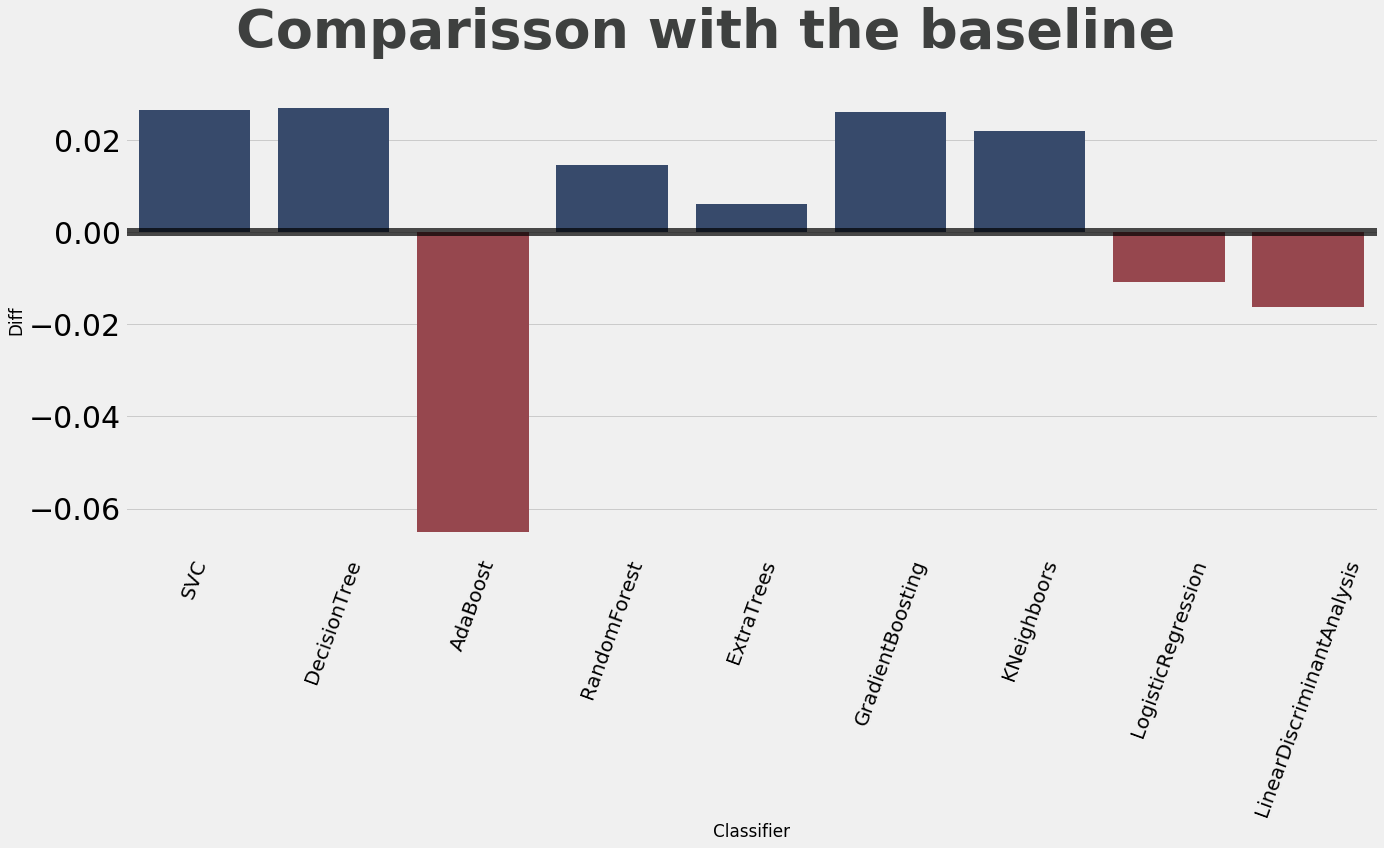

In [86]:
#vizually
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
colors  = ['#a33a43' if (x < 0) else '#2e4874' for x in cv_res.Diff ]

fte = sns.barplot("Classifier","Diff", data = cv_res, palette=colors)
fte.text(x = 0.3,
         y = 0.04, 
         s = "Comparisson with the baseline",
         fontsize = 54,
         alpha = .95,
         color = '#343635',
         weight = 'bold')

#customizing plot
fte.tick_params(axis = 'x', which = 'major', labelsize = 20, rotation=70,)
fte.tick_params(axis = 'y', which = 'major', labelsize = 30)

fte.axhline(y = 0, color = 'black', linewidth = 8, alpha = .7)

SVC, GradientBoosting, Kneighbours, Random Forest gave acceptable results

## SVC 

In [90]:
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 0.5, 1, 5],
                  'C': [1, 2, 3, 5, 7, 9]}
gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kf, scoring="f1", n_jobs= 4, verbose = 1)
gsSVMC.fit(xtrain,ytrain)
SVMC_best = gsSVMC.best_estimator_

gsSVMC.best_score_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:  7.1min finished


0.92799819123425342

## GradientBoosting

In [94]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance", 'exponential'],
              'n_estimators' : [100,200,250, 300],
              'learning_rate': [ 0.01, 0.05, 0.1],
              'max_depth': [8, 7,10, 15],
              'min_samples_leaf': [25, 150, 100,],
              'max_features': [5, 6,  8, 10, 15] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kf, scoring="f1", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   18.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  7.0min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 12.1min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 17.0min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 24.8min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed: 31.4min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed: 40.9min
[Parallel(n_jobs=4)]: Done 4992 tasks      | elapsed: 51.3min
[Parallel(n_jobs=4)]: Done 6042 tasks      | elapsed: 62.3min
[Parallel(n_jobs=4)]: Done 7192 tasks      | elapsed: 75.2min
[Parallel(n_jobs=4)]: Done 7200 out of 7200 | elapsed: 75.4min finished


0.92815640100858343

## KNeighbours 

In [144]:
knn = KNeighborsClassifier()
['ball_tree']
knn_param_grid = {'n_neighbors': [ 10, 11, 12, 13, 14, 15, 16], 
                  'weights': ['distance'],
                  'algorithm': ['ball_tree'], #['ball_tree', 'kd_tree', 'brute']
                 'leaf_size': [27, 30, 33],
                 'p':[1, 2, 3]}

gsKNN = GridSearchCV(knn,param_grid = knn_param_grid, cv=kf, scoring="f1", n_jobs= 4, verbose = 1)

gsKNN.fit(X_train,Y_train)

KNN_best = gsKNN.best_estimator_

# Best score
gsKNN.best_score_

Fitting 5 folds for each of 63 candidates, totalling 315 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   28.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 315 out of 315 | elapsed:  3.5min finished


0.92772254428097434

### RandomForest 

In [104]:
rf_param_grid = {"max_depth" : (6, 7, 9),
                 "min_samples_leaf" :  range(5,10),
                 "max_features" : (5,8,15,20),
                 "criterion" : ('gini', 'entropy'),
                 "n_estimators": (100, 250,350,500)}

RF = RandomForestClassifier(random_state=42)
gsRF = GridSearchCV(RF,param_grid = rf_param_grid, cv=kf, scoring="f1", n_jobs= 4, verbose = 1)

gsRF.fit(xtrain, ytrain)
RF_best = gsRF.best_estimator_

gsRF.best_score_

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   14.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  6.7min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 10.7min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 15.3min
[Parallel(n_jobs=4)]: Done 2400 out of 2400 | elapsed: 21.8min finished


0.92799819123425342

### Voting Classifier

In [114]:
votingC = VotingClassifier(estimators=[('dt', best_dt), ('rf', RF_best),
('svc', SVMC_best), ('knn', KNN_best), ('grdboost',GBC_best )], voting='soft', n_jobs=4)

score(votingC, xtrain, ytrain, xtest, ytest)

/Users/lena/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/lena/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/lena/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/lena/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/lena/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._back

CV score:   0.928000261509
f1 on holdout:  0.9205
?  0.0268  better  than baseline 
?  -0.0002  better?  than the best decesion tree  


## With OneHot Encoding

In [120]:
#lonehot encoding
random_state = 42
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(best_dt) #baseline decision tree 
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())

kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

X_train = xtrain
Y_train = ytrain
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, xtrain_onehot, y = ytrain, scoring = "f1", cv = kf, n_jobs=4))

cv_scores = []
diffs = []
for cv_result in cv_results:
    cv_scores.append(cv_result.mean())
    diffs.append(cv_result.mean() - baseline )
    
cv_res_onehot = pd.DataFrame({"TrainScore":cv_scores,"Diff": diffs,"Classifier":["SVC","DecisionTree",
"RandomForest","ExtraTrees","GradientBoosting","KNeighboors"]})

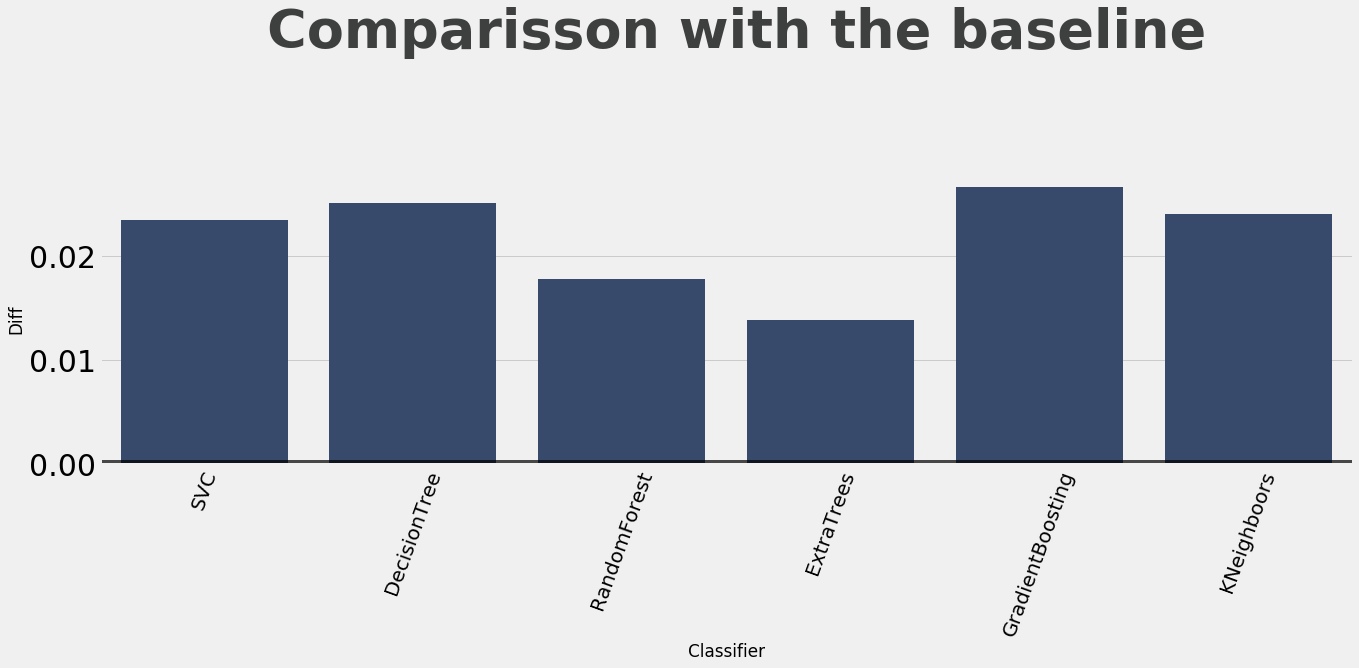

In [126]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)

#highlightning the bar with the largest value 
colors  = ['#a33a43' if (x < 0) else '#2e4874' for x in cv_res_onehot.Diff ]

fte = sns.barplot("Classifier","Diff", data = cv_res_onehot, palette=colors)
fte.text(x = 0.3,
         y = 0.04, 
         s = "Comparisson with the baseline",
         fontsize = 54,
         alpha = .95,
         color = '#343635',
         weight = 'bold')

#customizing plot
fte.tick_params(axis = 'x', which = 'major', labelsize = 20, rotation=70,)
fte.tick_params(axis = 'y', which = 'major', labelsize = 30)

fte.axhline(y = 0, color = 'black', linewidth = 8, alpha = .7)

### Gradient Boosting

In [125]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance", 'exponential'],
              'n_estimators' : [100,200,250],
              'learning_rate': [ 0.01, 0.05, 0.1],
              'max_depth': [8, 7,10, 15],
              'min_samples_leaf': [25, 150, 100,],
              'max_features': [ 10, 11, 15, 20] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kf, scoring="f1", n_jobs= 4, verbose = 1)

gsGBC.fit(xtrain_onehot,Y_train)

GBC_best_ohe = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   24.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  5.0min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  9.8min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 15.1min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 21.0min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 28.8min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed: 37.2min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed: 45.7min
[Parallel(n_jobs=4)]: Done 4320 out of 4320 | elapsed: 49.3min finished


0.92785743600785309

### KNeighbours

In [142]:
knn = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [ 10, 11, 12, 13, 14, 15, 16], 
                  'weights': ['distance'],
                  'algorithm': ['ball_tree'], #['ball_tree', 'kd_tree', 'brute']
                 'leaf_size': [27, 30, 33],
                 'p':[1, 2, 3]}

gsKNN = GridSearchCV(knn,param_grid = knn_param_grid, cv=kf, scoring="f1", n_jobs= 4, verbose = 1)

gsKNN.fit(X_train,Y_train)

KNN_best_ohe = gsKNN.best_estimator_

gsKNN.best_score_

Fitting 5 folds for each of 63 candidates, totalling 315 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   26.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 315 out of 315 | elapsed:  3.8min finished


0.92772254428097434

### SVC

In [134]:
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 0.5, 1, 5],
                  'C': [1, 2, 3, 5, 7, 9]}
gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kf, scoring="f1", n_jobs= 4, verbose = 1)
gsSVMC.fit(xtrain,ytrain)
SVMC_best_ohe = gsSVMC.best_estimator_

gsSVMC.best_score_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:  7.4min finished


0.92799819123425342

## Summary 

In [148]:
classifiers = [SVMC_best_ohe, KNN_best_ohe, GBC_best_ohe, RF_best, KNN_best, GBC_best, SVMC_best, best_dt ]
flags_ohe = [True, True, True, False, False, False, False, False]

cv_results = []
hold_results = []
for cls, ohe in zip(classifiers, flags_ohe):
    
    if ohe: 
        x__train = xtrain_onehot
        x__test = xtest_onehot
    else:
        x__train = xtrain
        x__test = xtest
    cv_results.append(cross_val_score(classifier, x__train, y = ytrain, scoring = "f1", cv = kf, n_jobs=4).mean())    
    cls.fit(x__train, ytrain)
    hold_results.append(f1_score(y_true, cls.predict(x__test)))


In [149]:
classifiers = ['SVM_OneHot', 'KNN_OneHot', 'GradB_OneHot', 'RandomF_Label', 'KNN_Label', 
               'GradB_Label', 'SVM_Label', 'DecTree_Label' ]
total_results = pd.DataFrame({"CV":cv_results,"Holdout": hold_results}, index = classifiers)

In [150]:
total_results

,CV,Holdout
SVM_OneHot,0.925255,0.916067
KNN_OneHot,0.925255,0.920482
GradB_OneHot,0.925255,0.919928
RandomF_Label,0.923140,0.920482
KNN_Label,0.923140,0.920482
GradB_Label,0.923140,0.919928
SVM_Label,0.923140,0.920482
DecTree_Label,0.923140,0.920482
